In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [5]:
data = pd.read_csv('2022.csv')

In [6]:
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [7]:
data_columns = ['Country', 'Happiness score', 'Explained by: GDP per capita', 'Explained by: Social support', 
                'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 
                'Explained by: Generosity', 'Explained by: Perceptions of corruption']

In [8]:
data = data[data_columns].copy()

In [9]:
happy_df = data.rename({'Country':'country_name', 'Happiness score':'happiness_score', 
                        'Explained by: GDP per capita':'explained_by_gdp_per_capita', 
                        'Explained by: Social support':'explained_by_social_support', 
                        'Explained by: Healthy life expectancy':'explained_by_healthy_life_expectancy', 
                        'Explained by: Freedom to make life choices':'explained_by_freedom_to_make_life_choices',
                        'Explained by: Generosity':'explained_by_generosity', 
                        'Explained by: Perceptions of corruption':'explained_by_perceptions_of_corruption'}, axis =1)

In [10]:
happy_df.head()

,country_name,happiness_score,explained_by_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [11]:
happy_df.dropna(inplace=True)

In [12]:
happy_df.isnull().sum()

country_name                                 0
happiness_score                              0
explained_by_gdp_per_capita                  0
explained_by_social_support                  0
explained_by_healthy_life_expectancy         0
explained_by_freedom_to_make_life_choices    0
explained_by_generosity                      0
explained_by_perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

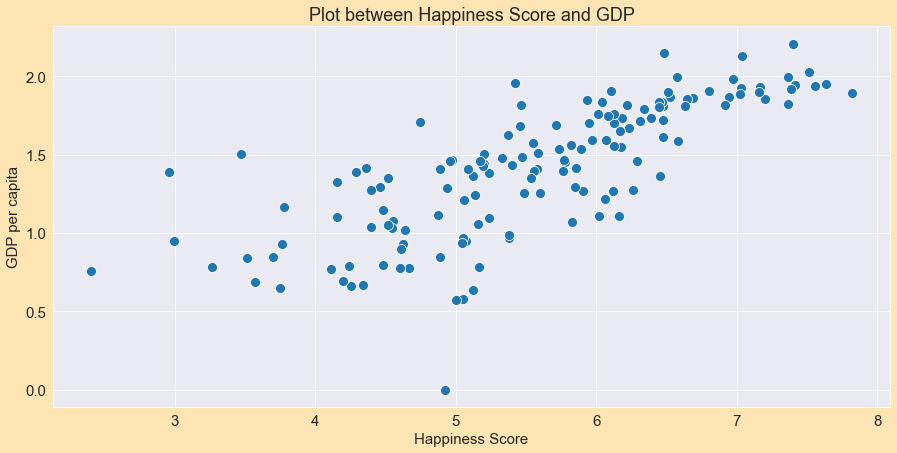

In [13]:
# Plot between happiness and GDP

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.explained_by_gdp_per_capita, s = 100);

plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

<AxesSubplot:>

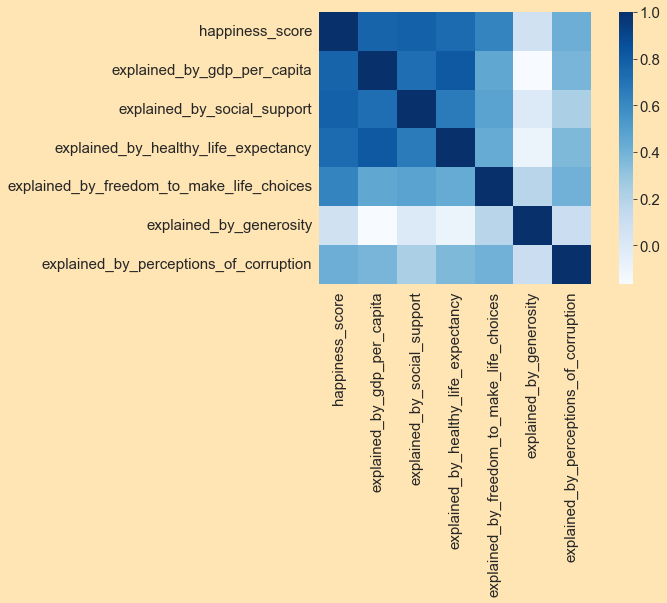

In [14]:
# Correlation Map
# Dark Blue = High Correlation, Light Blue = low Correlation

cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=bool),
           cmap="Blues", square=True, ax=ax)

In [15]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\Joe\AppData\Local\Temp\ipykernel_21772\664899830.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation = 45, ha='right')
C:\Users\Joe\AppData\Local\Temp\ipykernel_21772\664899830.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation = 45, ha='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

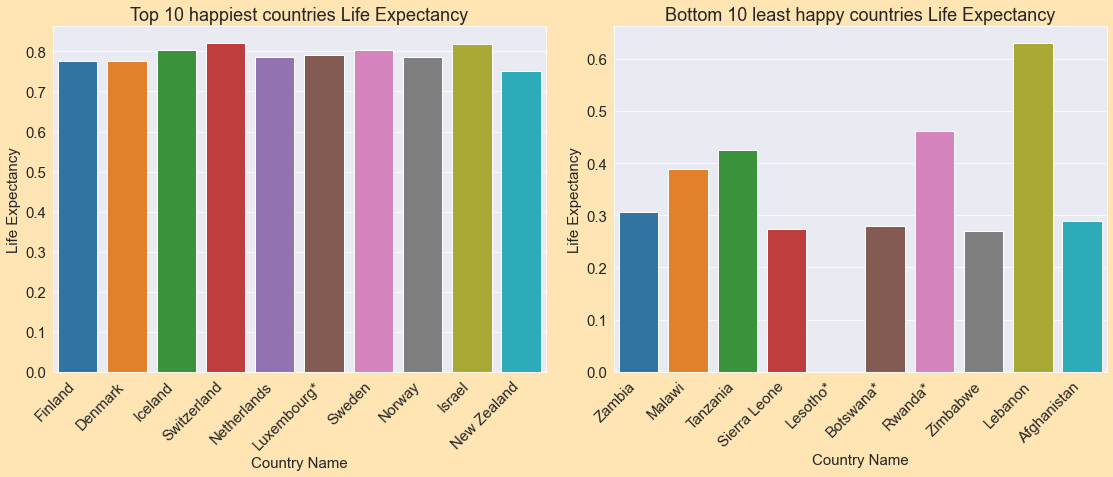

In [16]:
#Top 10 and Bottom 10 life expectancy countries 

fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x= top_10.country_name, y= top_10.explained_by_healthy_life_expectancy, ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x= bottom_10.country_name, y= bottom_10.explained_by_healthy_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

<BarContainer object of 10 artists>

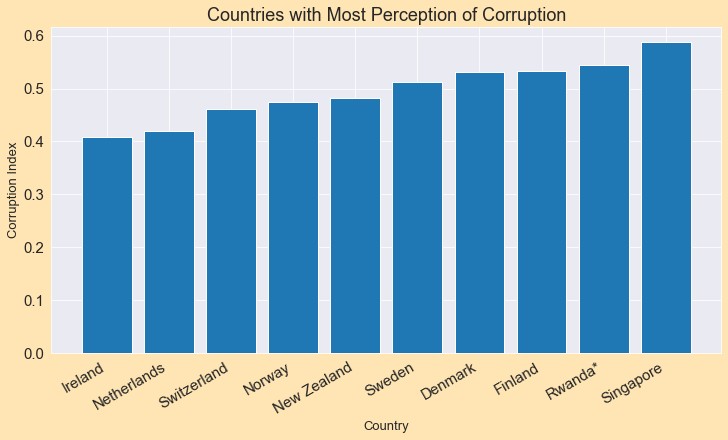

In [17]:
# Countries with most percentage of corruption

country = happy_df.sort_values(by='explained_by_perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name, country.explained_by_perceptions_of_corruption)

Text(0, 0.5, 'Corruption')

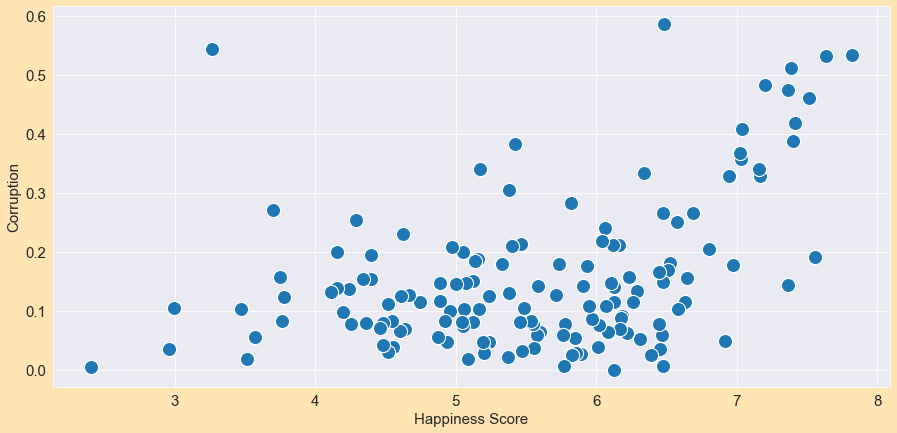

In [18]:
# corruption vs happiness 

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df.happiness_score, y=happy_df.explained_by_perceptions_of_corruption, s= 200)
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

Text(0, 0.5, 'Freedom to make Life Choices')

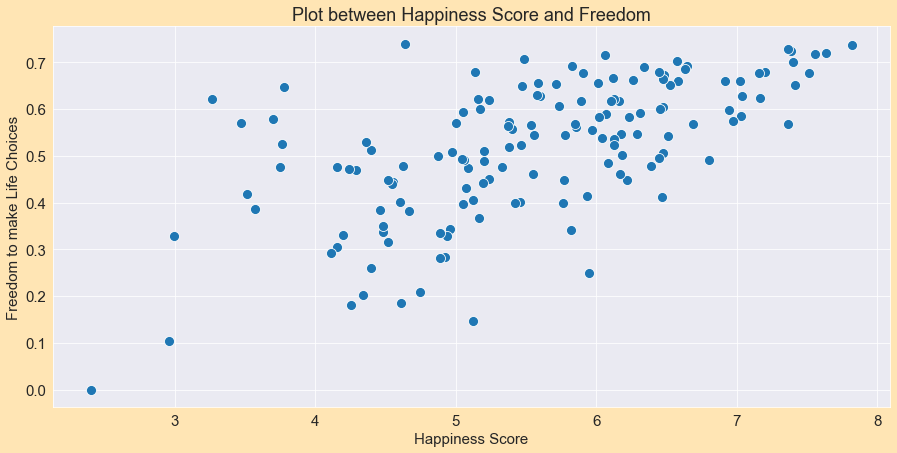

In [20]:
# Plot between happiness and freedom

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and Freedom')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.explained_by_freedom_to_make_life_choices, s = 100);

plt.xlabel('Happiness Score')
plt.ylabel('Freedom to make Life Choices')

Text(0, 0.5, 'Generosity')

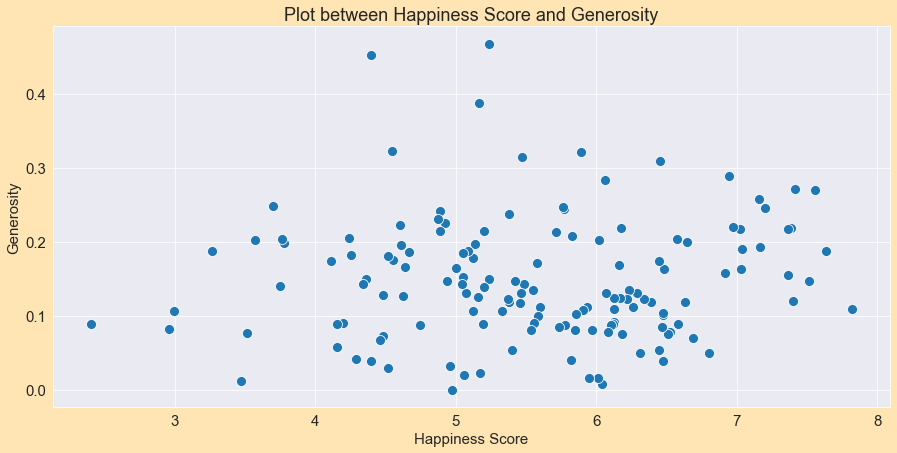

In [21]:
# Plot between happiness and generosity

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and Generosity')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.explained_by_generosity, s = 100);

plt.xlabel('Happiness Score')
plt.ylabel('Generosity')